In [6]:
#Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.
#Ans.
import pandas as pd
df = pd.read_csv('dataset.csv')

df.isnull().sum()

df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [10]:
#Q2. Split the dataset into a training set (70%) and a test set (30%).
#Ans.
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
#Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.
#Ans.
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with 100 trees and maximum depth of 10
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training set
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [11]:
#Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
#Ans.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Accuracy: 0.813
Precision: 0.837
Recall: 0.820
F1 score: 0.828


Top 5 most important features:
Index(['ca_0', 'thal_2', 'oldpeak', 'thalach', 'cp_0'], dtype='object')


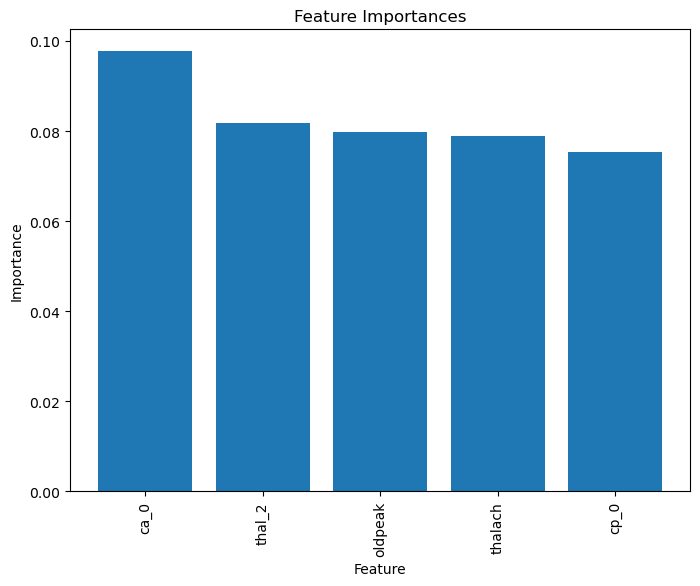

In [15]:
#Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.
#Ans.
import matplotlib.pyplot as plt

# Identify the top 5 most important features
importances = rfc.feature_importances_
indices = (-importances).argsort()[:5]
features = X.columns[indices]
print("Top 5 most important features:")
print(features)

# Visualize feature importances using a bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()


In [18]:
#Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
#Ans.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier object
rf = RandomForestClassifier(random_state=42)

# Create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding performance score
print('Best parameters:', grid_search.best_params_)
print('Best F1 score:', grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best F1 score: 0.8377217984990617


In [17]:
#Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.
#Ans.
from sklearn.model_selection import GridSearchCV

# define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a random forest classifier object
rfc = RandomForestClassifier()

# create a grid search object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

# fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# print the best set of hyperparameters found
print("Best parameters:", grid_search.best_params_)

# evaluate the performance of the tuned model on the test set
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Best parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.8571428571428571
Precision: 0.8627450980392157
Recall: 0.88
F1 score: 0.8712871287128714


In [ ]:
#Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot thedecision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.
#Ans.
# Interpreting the decision boundaries of a random forest classifier can be challenging, especially in high-dimensional feature spaces. 
# Additionally, the model's predictions may be influenced by factors that are not captured by the available features, such as genetic predisposition or lifestyle choices.
# Therefore, while the model can provide valuable insights into heart disease risk, it should be used in conjunction with other medical and lifestyle factors for making clinical decisions.